In [1]:
# Importing required libraries

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O
import seaborn as sns
import matplotlib.pyplot as plt # Matlab-style plotting
from datetime import datetime
%matplotlib inline
plt.style.use("ggplot") # to make the plots to look nicer

import warnings 
warnings.filterwarnings('ignore') #to ignore if any warnings takes place during the run time.

In [2]:
# Loading the train dataset 

train = pd.read_csv(r"C:\Users\karth\Downloads\TRAIN.csv")
train.head()

ID  Store_id Store_Type Location_Type Region_Code        Date  \
0  T1000001         1         S1            L3          R1  2018-01-01   
1  T1000002       253         S4            L2          R1  2018-01-01   
2  T1000003       252         S3            L2          R1  2018-01-01   
3  T1000004       251         S2            L3          R1  2018-01-01   
4  T1000005       250         S2            L3          R4  2018-01-01   

   Holiday Discount  #Order     Sales  
0        1      Yes       9   7011.84  
1        1      Yes      60  51789.12  
2        1      Yes      42  36868.20  
3        1      Yes      23  19715.16  
4        1      Yes      62  45614.52

In [3]:
# Loading the test dataset 

test = pd.read_csv(r"C:\Users\karth\Downloads\TEST_FINAL.csv")
test.head()

ID  Store_id Store_Type Location_Type Region_Code        Date  \
0  T1188341       171         S4            L2          R3  2019-06-01   
1  T1188342       172         S1            L1          R1  2019-06-01   
2  T1188343       173         S4            L2          R1  2019-06-01   
3  T1188344       174         S1            L1          R4  2019-06-01   
4  T1188345       170         S1            L1          R2  2019-06-01   

   Holiday Discount  
0        0       No  
1        0       No  
2        0       No  
3        0       No  
4        0       No

In [4]:
sample = pd.read_csv(r"C:\Users\karth\Downloads\SAMPLE.csv")
sample.head()

ID  Sales
0  T1188341  42275
1  T1188342  42275
2  T1188343  42275
3  T1188344  42275
4  T1188345  42275

In [5]:
train.shape

(188340, 10)

In [6]:
test.shape

(22265, 8)

In [7]:
sample.shape

(22265, 2)

In [8]:
train.describe()

Store_id        Holiday         #Order          Sales
count  188340.000000  188340.000000  188340.000000  188340.000000
mean      183.000000       0.131783      68.205692   42784.327982
std       105.366308       0.338256      30.467415   18456.708302
min         1.000000       0.000000       0.000000       0.000000
25%        92.000000       0.000000      48.000000   30426.000000
50%       183.000000       0.000000      63.000000   39678.000000
75%       274.000000       0.000000      82.000000   51909.000000
max       365.000000       1.000000     371.000000  247215.000000

In [9]:
test.describe()

Store_id       Holiday
count  22265.000000  22265.000000
mean     183.000000      0.032787
std      105.368395      0.178082
min        1.000000      0.000000
25%       92.000000      0.000000
50%      183.000000      0.000000
75%      274.000000      0.000000
max      365.000000      1.000000

In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188340 entries, 0 to 188339
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   ID             188340 non-null  object 
 1   Store_id       188340 non-null  int64  
 2   Store_Type     188340 non-null  object 
 3   Location_Type  188340 non-null  object 
 4   Region_Code    188340 non-null  object 
 5   Date           188340 non-null  object 
 6   Holiday        188340 non-null  int64  
 7   Discount       188340 non-null  object 
 8   #Order         188340 non-null  int64  
 9   Sales          188340 non-null  float64
dtypes: float64(1), int64(3), object(6)
memory usage: 14.4+ MB


In [11]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22265 entries, 0 to 22264
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   ID             22265 non-null  object
 1   Store_id       22265 non-null  int64 
 2   Store_Type     22265 non-null  object
 3   Location_Type  22265 non-null  object
 4   Region_Code    22265 non-null  object
 5   Date           22265 non-null  object
 6   Holiday        22265 non-null  int64 
 7   Discount       22265 non-null  object
dtypes: int64(2), object(6)
memory usage: 1.4+ MB


In [12]:
# pd.set_option('display.max_columns', 100)
# pd.set_option('display.max_rows', 100)
train['Store_id'].value_counts(normalize = True) # normalize = True , will return percentage according to frequency

255    0.00274
38     0.00274
294    0.00274
39     0.00274
167    0.00274
        ...   
337    0.00274
82     0.00274
210    0.00274
338    0.00274
128    0.00274
Name: Store_id, Length: 365, dtype: float64

In [13]:
test['Store_id'].value_counts(normalize = True)

351    0.00274
356    0.00274
21     0.00274
37     0.00274
53     0.00274
        ...   
250    0.00274
266    0.00274
282    0.00274
298    0.00274
16     0.00274
Name: Store_id, Length: 365, dtype: float64

In [14]:
train['Store_Type'].value_counts(normalize = True)

S1    0.471233
S4    0.243836
S2    0.153425
S3    0.131507
Name: Store_Type, dtype: float64

In [15]:
test['Store_Type'].value_counts(normalize = True)

S1    0.471233
S4    0.243836
S2    0.153425
S3    0.131507
Name: Store_Type, dtype: float64

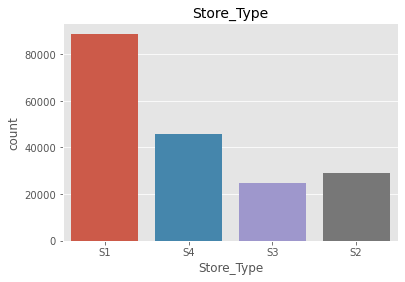

<Figure size 2160x1440 with 0 Axes>

In [16]:
# Let's use countplot() function from seaborn library to visualize Type variable

sns.countplot(train['Store_Type'])
plt.title("Store_Type",fontsize=14)
plt.figure(figsize=(30, 20))
plt.show()

In [17]:
train['Location_Type'].value_counts(normalize = True)

L1    0.452055
L2    0.257534
L3    0.158904
L5    0.073973
L4    0.057534
Name: Location_Type, dtype: float64

In [18]:
test['Location_Type'].value_counts(normalize = True)

L1    0.452055
L2    0.257534
L3    0.158904
L5    0.073973
L4    0.057534
Name: Location_Type, dtype: float64

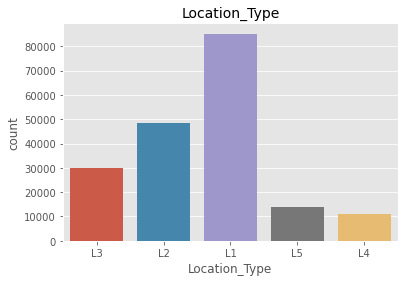

<Figure size 2160x1440 with 0 Axes>

In [19]:
# Let's use countplot() function from seaborn library to visualize Type variable

sns.countplot(train['Location_Type'])
plt.title("Location_Type",fontsize=14)
plt.figure(figsize=(30, 20))
plt.show()

In [20]:
train['Region_Code'].value_counts(normalize = True)

R1    0.339726
R2    0.287671
R3    0.235616
R4    0.136986
Name: Region_Code, dtype: float64

In [21]:
test['Region_Code'].value_counts(normalize = True)

R1    0.339726
R2    0.287671
R3    0.235616
R4    0.136986
Name: Region_Code, dtype: float64

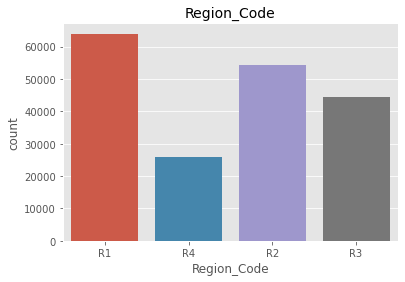

<Figure size 2160x1440 with 0 Axes>

In [22]:
# Let's use countplot() function from seaborn library to visualize Type variable

sns.countplot(train['Region_Code'])
plt.title("Region_Code",fontsize=14)
plt.figure(figsize=(30, 20))
plt.show()

In [23]:
train['Holiday'].value_counts(normalize = True)

0    0.868217
1    0.131783
Name: Holiday, dtype: float64

In [24]:
test['Holiday'].value_counts(normalize = True)

0    0.967213
1    0.032787
Name: Holiday, dtype: float64

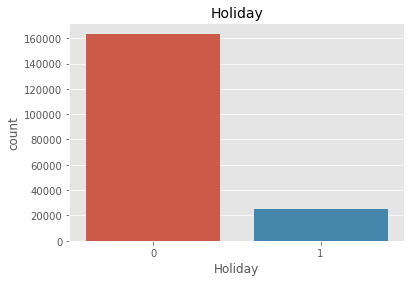

<Figure size 2160x1440 with 0 Axes>

In [25]:
# Let's use countplot() function from seaborn library to visualize IsHoliday_x variable

sns.countplot(train['Holiday'])
plt.title("Holiday",fontsize=14)
plt.figure(figsize=(30, 20))
plt.show()

In [26]:
train['Discount'].value_counts(normalize = True)

No     0.552464
Yes    0.447536
Name: Discount, dtype: float64

In [27]:
test['Discount'].value_counts(normalize = True)

No     0.573681
Yes    0.426319
Name: Discount, dtype: float64

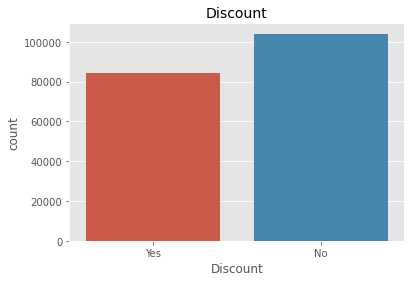

<Figure size 2160x1440 with 0 Axes>

In [28]:
sns.countplot(train['Discount'])
plt.title("Discount",fontsize=14)
plt.figure(figsize=(30, 20))
plt.show()

In [29]:
train['#Order'].value_counts(normalize = True)

53     0.018196
59     0.018148
56     0.017877
51     0.017702
58     0.017500
         ...   
347    0.000005
300    0.000005
297    0.000005
296    0.000005
291    0.000005
Name: #Order, Length: 299, dtype: float64

<AxesSubplot:title={'center':'Daily Sales Boxplot'}>

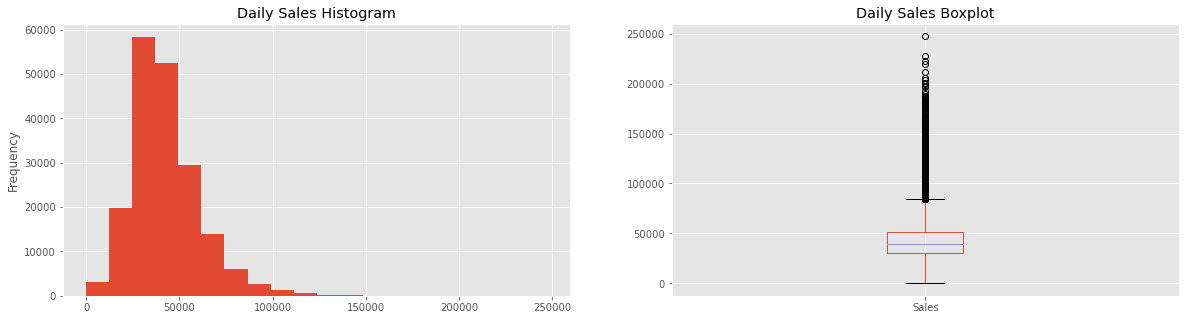

In [30]:
f, ax = plt.subplots(1,2, figsize = (20, 5))

train.Sales.plot(kind = "hist", title = "Daily Sales Histogram", bins = 20, ax = ax[0])
train.Sales.plot.box(title = "Daily Sales Boxplot", ax = ax[1])

In [31]:
##--------------Based on box plot--------------------

print("Company has", round(train.Sales[(train.Sales > 100000)].count() / train.shape[0] * 100, 2), 
      "% of the time big sales")
print("----"*16)
print("Company has", round(train.Sales[(train.Sales < 1000)].count() / train.shape[0] * 100, 4), 
      "% of the time low sales")

Company has 1.15 % of the time big sales
----------------------------------------------------------------
Company has 0.0106 % of the time low sales


In [32]:
##--------------Based on box plot--------------------

train[(train.Sales > 200000)]

ID  Store_id Store_Type Location_Type Region_Code        Date  \
63672   T1063673       337         S4            L2          R1  2018-06-24   
68703   T1068704       175         S4            L2          R1  2018-07-08   
155790  T1155791       175         S4            L2          R1  2019-03-03   
168624  T1168625       315         S4            L2          R1  2019-04-07   
178304  T1178305       175         S4            L2          R1  2019-05-04   
178372  T1178373        87         S4            L2          R3  2019-05-04   
178553  T1178554       146         S4            L2          R1  2019-05-05   
178648  T1178649       175         S4            L2          R1  2019-05-05   

        Holiday Discount  #Order     Sales  
63672         0      Yes     316  219984.0  
68703         0      Yes     333  203337.0  
155790        0      Yes     347  200742.0  
168624        0      Yes     331  211914.0  
178304        0      Yes     348  222516.0  
178372        0      Yes     233  227127.0  
178553        0      Yes     306  205605.0  
178648        0      Yes     371  247215.0

In [33]:
# Checking unique values in each variable

"""The unique() function of pandas returns the list of unique values in the dataset."""

train.nunique()

ID               188340
Store_id            365
Store_Type            4
Location_Type         5
Region_Code           4
Date                516
Holiday               2
Discount              2
#Order              299
Sales             47422
dtype: int64

In [34]:
test.nunique()

ID               22265
Store_id           365
Store_Type           4
Location_Type        5
Region_Code          4
Date                61
Holiday              2
Discount             2
dtype: int64

In [35]:
# Checking for null values

train.isnull().sum()

ID               0
Store_id         0
Store_Type       0
Location_Type    0
Region_Code      0
Date             0
Holiday          0
Discount         0
#Order           0
Sales            0
dtype: int64

In [36]:
test.isnull().sum()

ID               0
Store_id         0
Store_Type       0
Location_Type    0
Region_Code      0
Date             0
Holiday          0
Discount         0
dtype: int64

In [37]:
# Removal of duplicate rows

print(f"Before removing duplicate rows {train.shape[0]} and columns {train.shape[1]}")

train = train.drop_duplicates()

print(f"\nAfter removing duplicate rows {train.shape[0]} and columns {train.shape[1]}")

Before removing duplicate rows 188340 and columns 10

After removing duplicate rows 188340 and columns 10


In [38]:
print(f"Before removing duplicate rows {test.shape[0]} and columns {test.shape[1]}")

test = test.drop_duplicates()

print(f"\nAfter removing duplicate rows {test.shape[0]} and columns {test.shape[1]}")

Before removing duplicate rows 22265 and columns 8

After removing duplicate rows 22265 and columns 8


In [39]:
train = train.drop(columns=['ID','#Order'])

train.columns

Index(['Store_id', 'Store_Type', 'Location_Type', 'Region_Code', 'Date',
       'Holiday', 'Discount', 'Sales'],
      dtype='object')

In [40]:
test = test.drop(columns=['ID'])
test.columns

Index(['Store_id', 'Store_Type', 'Location_Type', 'Region_Code', 'Date',
       'Holiday', 'Discount'],
      dtype='object')

In [41]:
train.head().append(train.tail()) #show the first and last 5 rows.

Store_id Store_Type Location_Type Region_Code        Date  Holiday  \
0              1         S1            L3          R1  2018-01-01        1   
1            253         S4            L2          R1  2018-01-01        1   
2            252         S3            L2          R1  2018-01-01        1   
3            251         S2            L3          R1  2018-01-01        1   
4            250         S2            L3          R4  2018-01-01        1   
188335       149         S2            L3          R2  2019-05-31        1   
188336       153         S4            L2          R1  2019-05-31        1   
188337       154         S1            L3          R2  2019-05-31        1   
188338       155         S3            L1          R2  2019-05-31        1   
188339       152         S2            L1          R1  2019-05-31        1   

       Discount     Sales  
0           Yes   7011.84  
1           Yes  51789.12  
2           Yes  36868.20  
3           Yes  19715.16  
4           Yes  45614.52  
188335      Yes  37272.00  
188336       No  54572.64  
188337       No  31624.56  
188338      Yes  49162.41  
188339       No  37977.00

In [42]:
train.dtypes

Store_id           int64
Store_Type        object
Location_Type     object
Region_Code       object
Date              object
Holiday            int64
Discount          object
Sales            float64
dtype: object

In [43]:
cat_cols = ['Store_Type','Location_Type','Region_Code','Discount','Date']

In [44]:
num_cols = [c for c in train if c not in cat_cols] # getting numeric columns from dataframe like this
print(num_cols)

['Store_id', 'Holiday', 'Sales']


<AxesSubplot:xlabel='Store_id', ylabel='Density'>

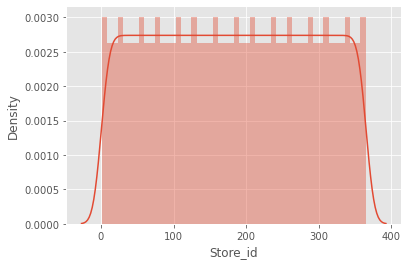

In [45]:
import seaborn as sns

sns.distplot(train['Store_id']) 

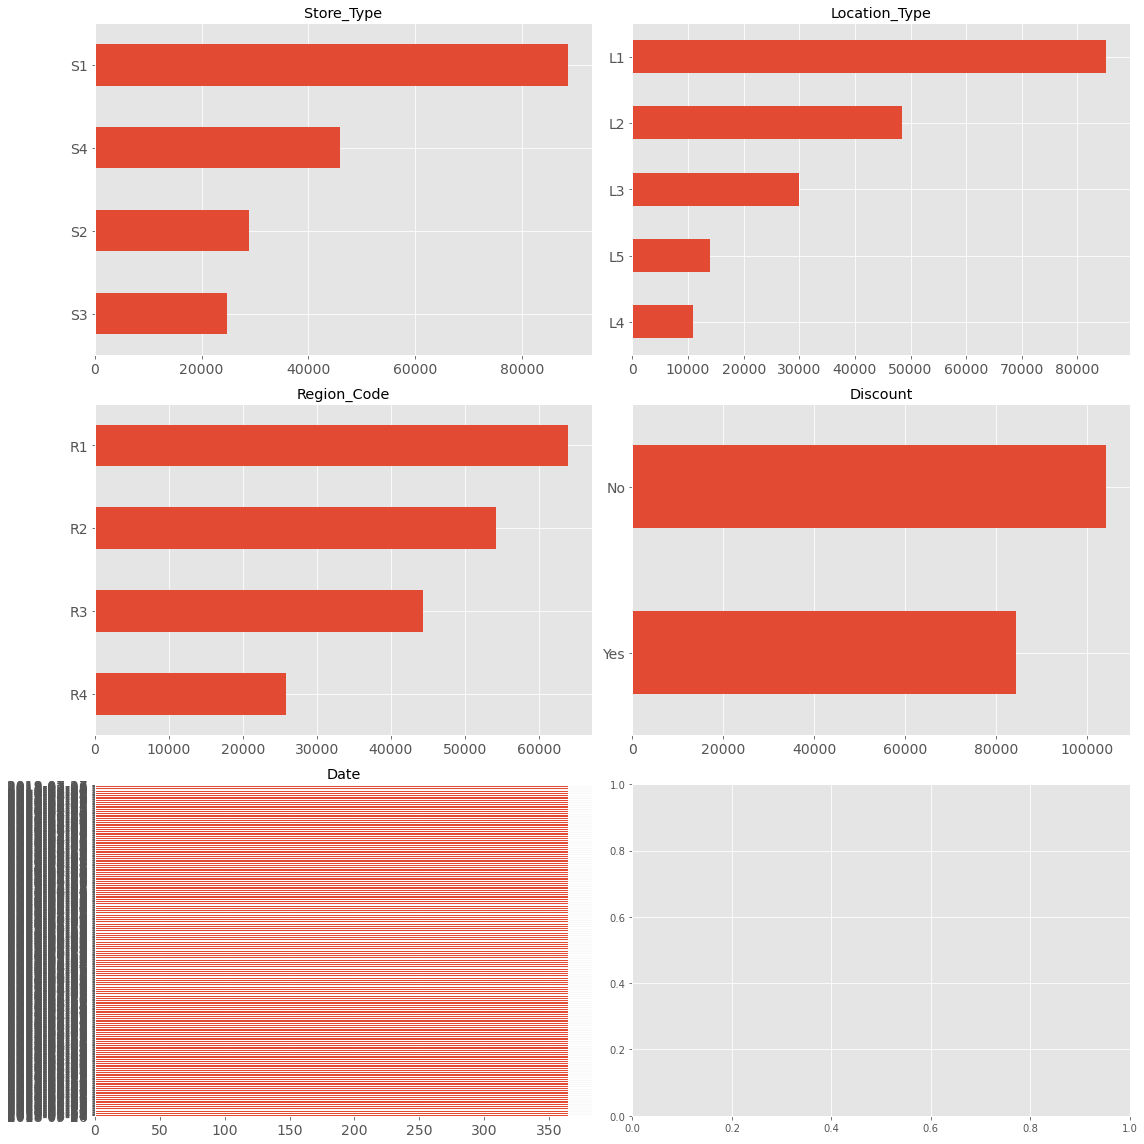

In [46]:
fig, axes = plt.subplots(3, 2, figsize=(16, 16)) #total 4 subplots that's why 2*2
axes = [ax for axes_row in axes for ax in axes_row]

for i, c in enumerate(train[cat_cols]):
    _ = train[c].value_counts()[::-1].plot(kind = 'barh', ax=axes[i], title=c, fontsize=14)
_ = plt.tight_layout()

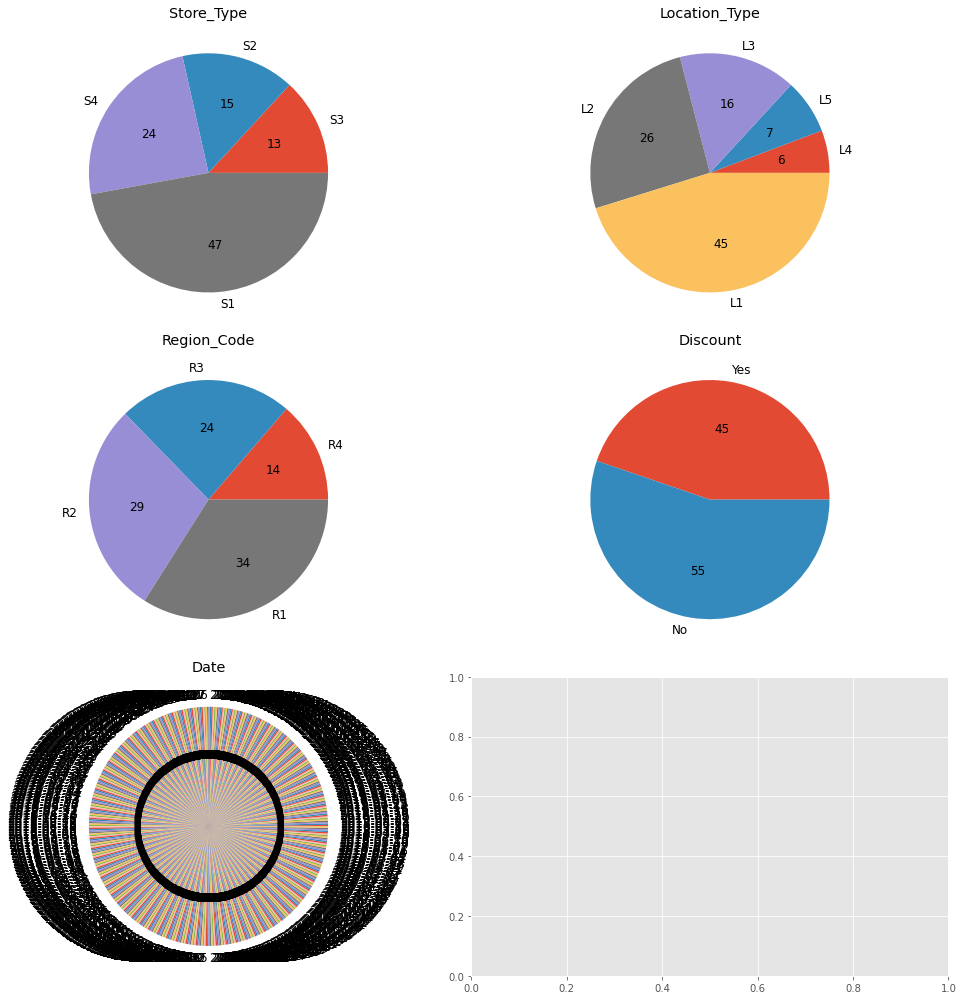

In [47]:
fig, axes = plt.subplots(3, 2, figsize=(14, 14))
axes = [ax for axes_row in axes for ax in axes_row]

for i, c in enumerate(train[cat_cols]):
    _ = train[c].value_counts()[::-1].plot(kind = 'pie', ax=axes[i], title=c, autopct='%.0f', fontsize=12)
    _ = axes[i].set_ylabel('')
    
_ = plt.tight_layout()

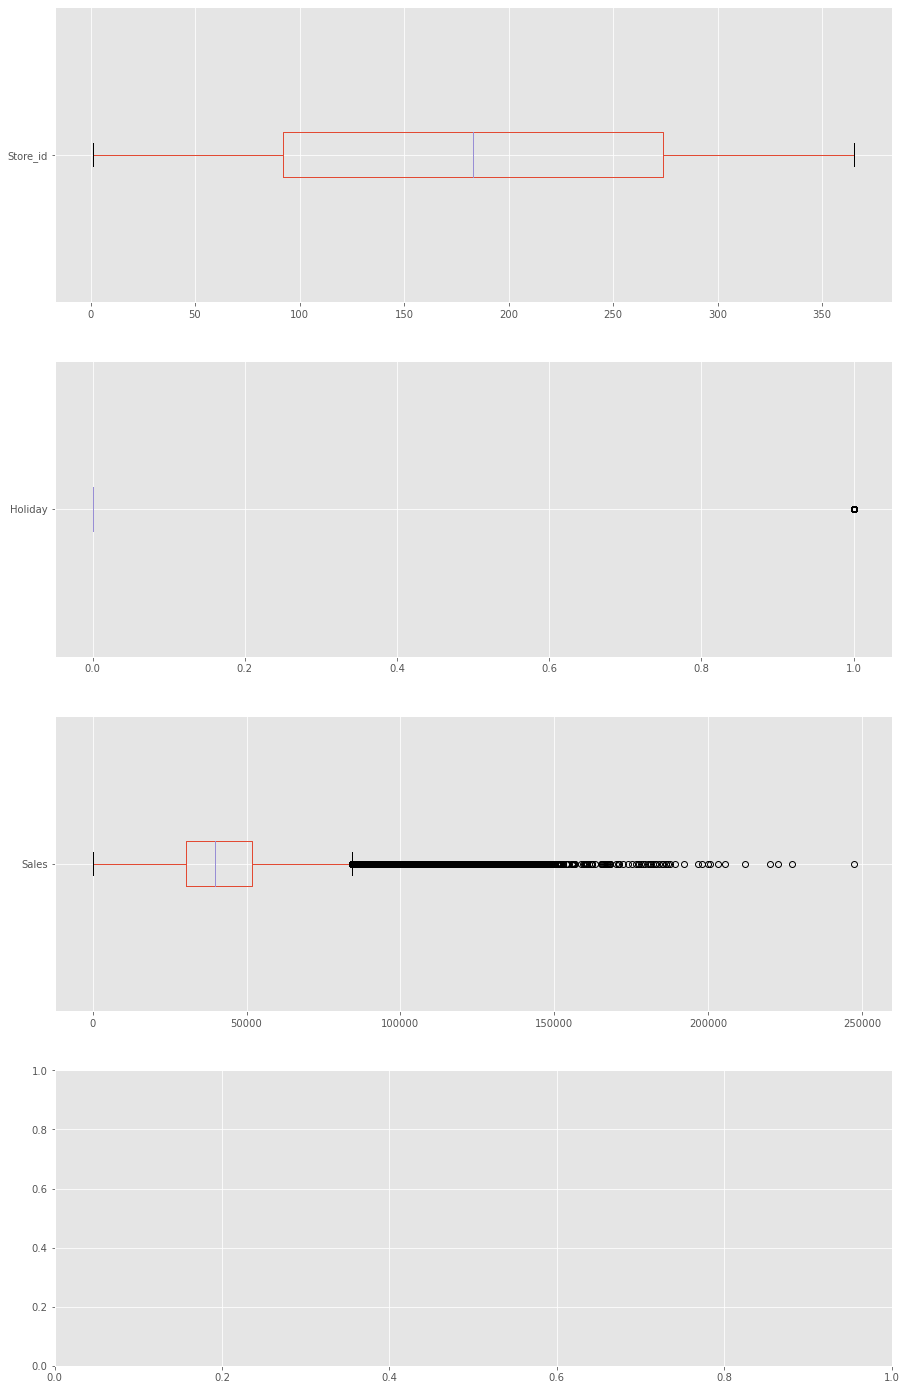

In [48]:
## Using Boxplots

fig, axes = plt.subplots(4,1, figsize=(15,25))
for i, c in enumerate(num_cols):
    _ = train[[c]].boxplot(ax=axes[i], vert=False)

<AxesSubplot:xlabel='Sales', ylabel='Density'>

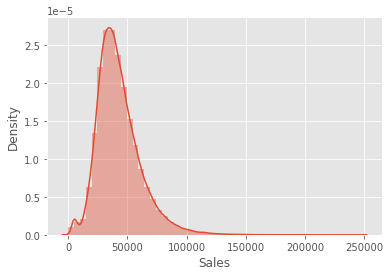

In [49]:
import seaborn as sns

sns.distplot(train['Sales']) #sns.distplot(data['Weekly_Sales'].dropna())

In [50]:
train['Sales'].describe()

count    188340.000000
mean      42784.327982
std       18456.708302
min           0.000000
25%       30426.000000
50%       39678.000000
75%       51909.000000
max      247215.000000
Name: Sales, dtype: float64

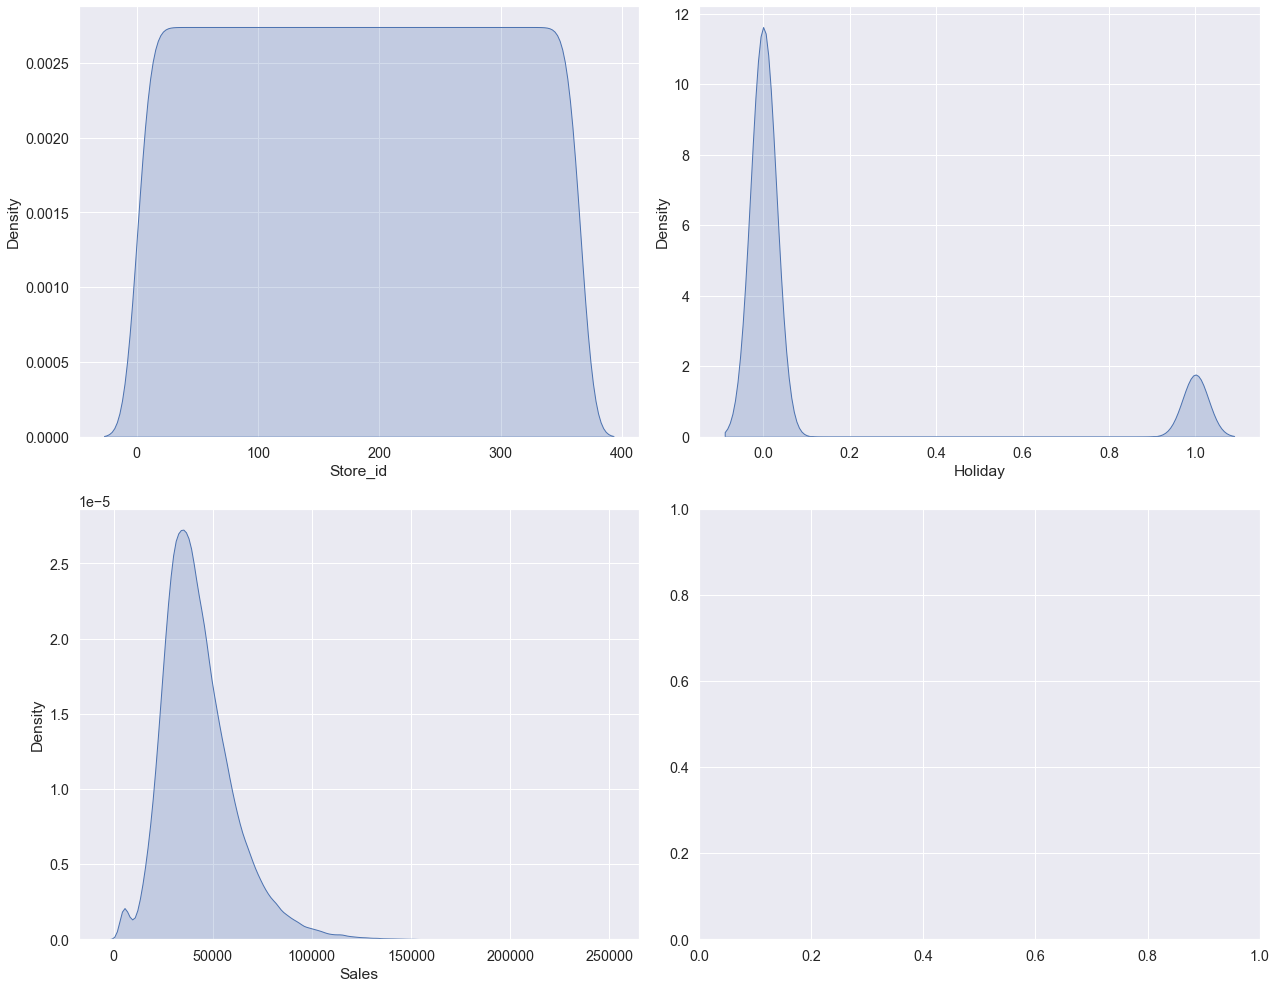

In [51]:
## Density plot

# A kernel density estimate (KDE) plot is a method for visualizing the distribution of observations in a dataset,
# analagous to a histogram. KDE represents the data using a continuous probability density curve in one or more dimensions.

sns.set(font_scale = 1.3)
fig, axes = plt.subplots(2, 2, figsize=(18, 14))
axes = [ax for axes_row in axes for ax in axes_row]
for i, c in enumerate(num_cols):
    plot = sns.kdeplot(data=train, x=c, ax=axes[i], fill=True)
plt.tight_layout()

In [52]:
train.Date = train.Date.astype("datetime64[ns]")

In [53]:
train.dtypes

Store_id                  int64
Store_Type               object
Location_Type            object
Region_Code              object
Date             datetime64[ns]
Holiday                   int64
Discount                 object
Sales                   float64
dtype: object

In [54]:
test.Date = test.Date.astype("datetime64[ns]")

In [55]:
test.dtypes

Store_id                  int64
Store_Type               object
Location_Type            object
Region_Code              object
Date             datetime64[ns]
Holiday                   int64
Discount                 object
dtype: object

In [57]:
import calendar

train["Month"] = train.Date.dt.month

train["Year"] = train.Date.dt.year

train["Day"] = train.Date.dt.day

train['Week_Number'] = train['Date'].dt.week

train['Quarter'] = train['Date'].dt.quarter

#train['Month'] = train['Date'].dt.month.apply(lambda x: calendar.month_abbr[x])

#The day of the week with Monday=0, Sunday=6.
#train['Day_of_week'] = train['Date'].dt.dayofweek

In [58]:
import calendar

test["Month"] = test.Date.dt.month

test["Year"] = test.Date.dt.year

test["Day"] = test.Date.dt.day

test['Week_Number'] = test['Date'].dt.week

test['Quarter'] = test['Date'].dt.quarter

#train['Month'] = train['Date'].dt.month.apply(lambda x: calendar.month_abbr[x])

#The day of the week with Monday=0, Sunday=6.
#train['Day_of_week'] = train['Date'].dt.dayofweek

In [60]:
train.isnull().sum()

Store_id         0
Store_Type       0
Location_Type    0
Region_Code      0
Date             0
Holiday          0
Discount         0
Sales            0
Month            0
Year             0
Day              0
Week_Number      0
Quarter          0
dtype: int64

In [61]:
test.isnull().sum()

Store_id         0
Store_Type       0
Location_Type    0
Region_Code      0
Date             0
Holiday          0
Discount         0
Month            0
Year             0
Day              0
Week_Number      0
Quarter          0
dtype: int64

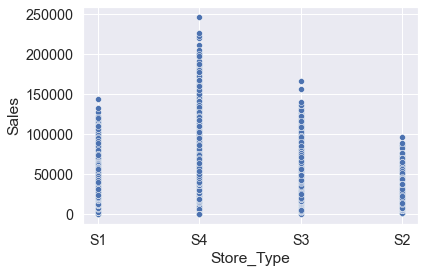

In [62]:
## Seeing distibution of Sales for every Store_Type

sns.scatterplot(x="Store_Type", y="Sales", data=train)
plt.show()

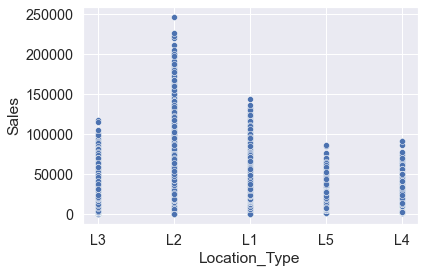

In [63]:
## Seeing distibution of Sales for every Store_Type

sns.scatterplot(x="Location_Type", y="Sales", data=train)
plt.show()

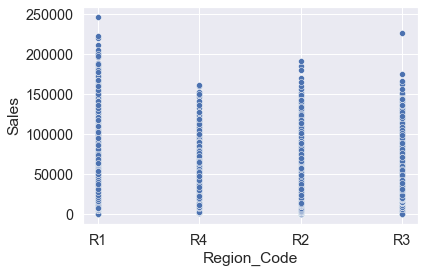

In [64]:
## Seeing distibution of Sales for every Store_Type

sns.scatterplot(x="Region_Code", y="Sales", data=train)
plt.show()

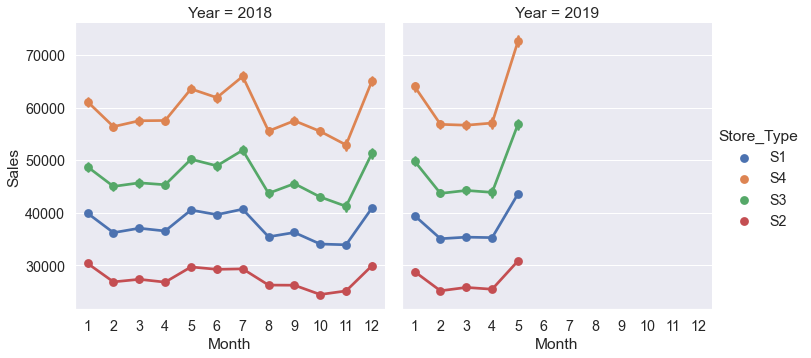

In [65]:
### Sales trend over the months 

# sns.factorplot(data=None, x=None, y=None, col=None, hue=None,  row=None)

#x, y : This parameter take names of variables in data, Inputs for plotting long-form data.
#hue : (optional)This parameter take column name for colour encoding
#data : This parameter take DataFrame, Long-form (tidy) dataset for plotting. Each column should correspond to a variable, and each row should correspond to an observation.
#row, col : (optional) This parameter take names of variables in data, Categorical variables that will determine the faceting of the grid.

sns.factorplot(data = train, x ="Month", y = "Sales", 
               col = "Year", hue = "Store_Type")

<AxesSubplot:xlabel='Year', ylabel='Sales'>

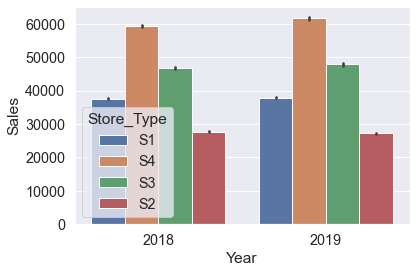

In [66]:
sns.barplot(x="Year", y="Sales", hue="Store_Type", data=train)

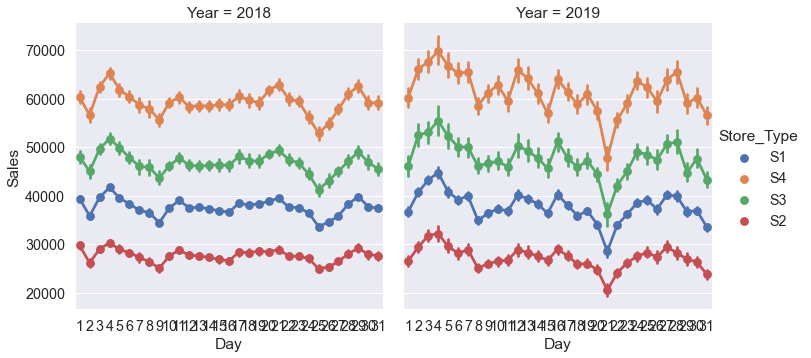

In [67]:
# Plotting factorplot() between day wise weekly sales 

sns.factorplot(data = train, x = "Day", y = "Sales",
               col = "Year", hue = "Store_Type")

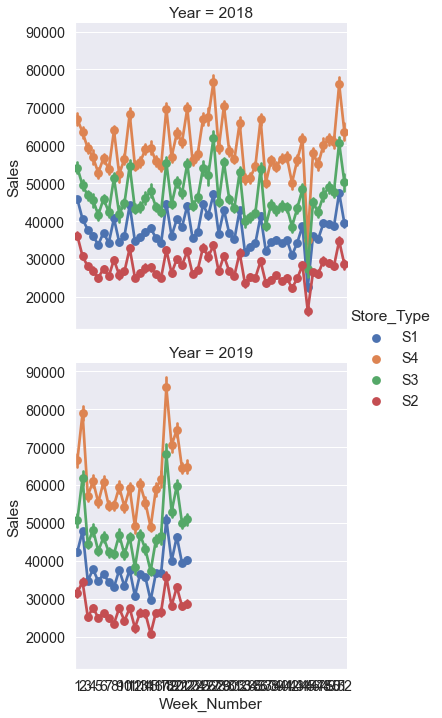

In [68]:
# Plotting factorplot() between weekly sales and Week Number

sns.factorplot(data = train, x = "Week_Number", y = "Sales",
               row = "Year", hue = "Store_Type")

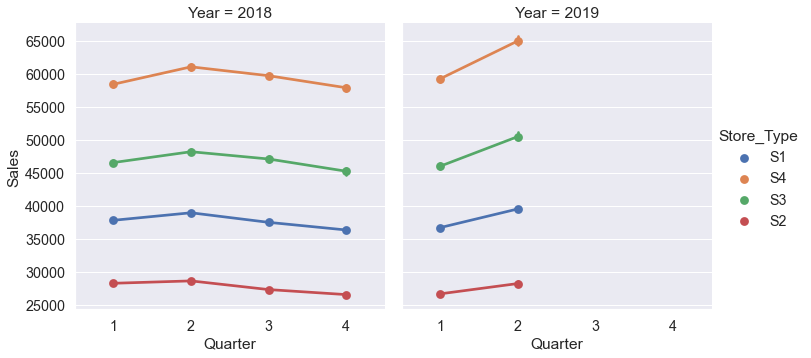

In [69]:
# Plotting factorplot() between Quaterly weekly sales

sns.factorplot(data = train, x = "Quarter", y = "Sales",
               col = "Year", hue = "Store_Type")

In [70]:
# # Plotting factorplot() between Season wise weekly sales  

# sns.factorplot(data = train, x = "Season", y = "Sales",
#                col = "Year", hue = "Store_Type")

In [71]:
train.dtypes

Store_id                  int64
Store_Type               object
Location_Type            object
Region_Code              object
Date             datetime64[ns]
Holiday                   int64
Discount                 object
Sales                   float64
Month                     int64
Year                      int64
Day                       int64
Week_Number               int64
Quarter                   int64
dtype: object

In [72]:
test.dtypes

Store_id                  int64
Store_Type               object
Location_Type            object
Region_Code              object
Date             datetime64[ns]
Holiday                   int64
Discount                 object
Month                     int64
Year                      int64
Day                       int64
Week_Number               int64
Quarter                   int64
dtype: object

In [75]:
train['Discount'] = train['Discount'].map({'Yes': 1, 'No': 0})
test['Discount'] = test['Discount'].map({'Yes': 1, 'No': 0})

In [79]:
train= pd.get_dummies(train,columns = ['Store_Type','Location_Type','Region_Code'])
train.head()

Store_id       Date  Holiday  Discount     Sales  Month  Year  Day  \
0         1 2018-01-01        1         1   7011.84      1  2018    1   
1       253 2018-01-01        1         1  51789.12      1  2018    1   
2       252 2018-01-01        1         1  36868.20      1  2018    1   
3       251 2018-01-01        1         1  19715.16      1  2018    1   
4       250 2018-01-01        1         1  45614.52      1  2018    1   

   Week_Number  Quarter  ...  Store_Type_S4  Location_Type_L1  \
0            1        1  ...              0                 0   
1            1        1  ...              1                 0   
2            1        1  ...              0                 0   
3            1        1  ...              0                 0   
4            1        1  ...              0                 0   

   Location_Type_L2  Location_Type_L3  Location_Type_L4  Location_Type_L5  \
0                 0                 1                 0                 0   
1                 1                 0                 0                 0   
2                 1                 0                 0                 0   
3                 0                 1                 0                 0   
4                 0                 1                 0                 0   

   Region_Code_R1  Region_Code_R2  Region_Code_R3  Region_Code_R4  
0               1               0               0               0  
1               1               0               0               0  
2               1               0               0               0  
3               1               0               0               0  
4               0               0               0               1  

[5 rows x 23 columns]

In [80]:
train.corr()

Store_id       Holiday  Discount     Sales  \
Store_id          1.000000e+00 -4.477583e-19 -0.000693  0.004377   
Holiday          -4.477583e-19  1.000000e+00  0.019545 -0.154779   
Discount         -6.928774e-04  1.954527e-02  1.000000  0.323906   
Sales             4.376631e-03 -1.547788e-01  0.323906  1.000000   
Month            -1.322907e-19  1.370518e-02  0.013692 -0.018092   
Year             -7.554975e-20  1.386181e-02 -0.030064  0.018284   
Day              -1.422895e-18  1.366827e-02 -0.078136 -0.038969   
Week_Number       4.594426e-20  1.716025e-02  0.007037 -0.025094   
Quarter           7.586318e-19  2.790917e-02  0.007520 -0.018504   
Store_Type_S1    -1.011072e-01  8.037425e-17 -0.001299 -0.261257   
Store_Type_S2     8.708300e-02  5.077300e-18 -0.001808 -0.351829   
Store_Type_S3    -5.616581e-02 -3.888942e-17  0.001783  0.090210   
Store_Type_S4     8.865249e-02  7.029552e-17  0.001625  0.528006   
Location_Type_L1 -6.196224e-02 -1.155020e-16 -0.001657 -0.065488   
Location_Type_L2 -1.010880e-02  8.203876e-18  0.001848  0.524828   
Location_Type_L3  4.594611e-02  6.366159e-18  0.000792 -0.228720   
Location_Type_L4  8.787903e-02  1.398366e-17 -0.000940 -0.183626   
Location_Type_L5 -7.649796e-03 -3.256673e-17 -0.000207 -0.269462   
Region_Code_R1    1.218802e-01 -2.924524e-17  0.000943  0.154724   
Region_Code_R2   -5.054762e-03 -2.453558e-17 -0.002442 -0.093980   
Region_Code_R3   -8.841265e-02  3.953269e-17  0.001689 -0.019246   
Region_Code_R4   -5.210487e-02  4.771960e-18 -0.000169 -0.065641   

                         Month          Year           Day   Week_Number  \
Store_id         -1.322907e-19 -7.554975e-20 -1.422895e-18  4.594426e-20   
Holiday           1.370518e-02  1.386181e-02  1.366827e-02  1.716025e-02   
Discount          1.369165e-02 -3.006382e-02 -7.813611e-02  7.037149e-03   
Sales            -1.809195e-02  1.828431e-02 -3.896935e-02 -2.509412e-02   
Month             1.000000e+00 -4.701419e-01  1.273428e-02  9.853936e-01   
Year             -4.701419e-01  1.000000e+00 -5.078096e-03 -4.621064e-01   
Day               1.273428e-02 -5.078096e-03  1.000000e+00  8.567797e-02   
Week_Number       9.853936e-01 -4.621064e-01  8.567797e-02  1.000000e+00   
Quarter           9.714954e-01 -4.581105e-01  1.378123e-02  9.593223e-01   
Store_Type_S1    -3.826577e-17 -3.026433e-18  8.641518e-18 -2.930368e-19   
Store_Type_S2    -2.026576e-17 -1.234173e-17 -1.622690e-17  6.586701e-18   
Store_Type_S3     2.487051e-17  6.207914e-17 -3.596096e-18 -7.753163e-18   
Store_Type_S4     1.647272e-17  5.871010e-17  1.442970e-18  6.834065e-18   
Location_Type_L1 -1.066253e-17 -1.169517e-16  1.137495e-17  4.871019e-18   
Location_Type_L2 -2.791159e-17  1.019512e-16  1.344150e-17  9.838503e-18   
Location_Type_L3  8.316578e-18  5.333169e-17  1.116173e-17 -5.198803e-18   
Location_Type_L4  1.184166e-18  8.456502e-17  1.350651e-17  1.051147e-17   
Location_Type_L5  6.685470e-17  1.103177e-16 -4.313070e-17 -1.981496e-17   
Region_Code_R1    2.130869e-17 -5.644681e-17  3.419110e-18  2.120874e-17   
Region_Code_R2    1.450511e-17 -3.538274e-17  9.130565e-18 -4.731937e-18   
Region_Code_R3    2.516383e-18  5.437510e-17  4.162417e-19  6.550518e-18   
Region_Code_R4   -5.987756e-18 -1.284818e-16 -1.384954e-17  1.285402e-17   

                       Quarter  Store_Type_S1  ...  Store_Type_S4  \
Store_id          7.586318e-19  -1.011072e-01  ...   8.865249e-02   
Holiday           2.790917e-02   8.037425e-17  ...   7.029552e-17   
Discount          7.520293e-03  -1.299490e-03  ...   1.624845e-03   
Sales            -1.850426e-02  -2.612569e-01  ...   5.280062e-01   
Month             9.714954e-01  -3.826577e-17  ...   1.647272e-17   
Year             -4.581105e-01  -3.026433e-18  ...   5.871010e-17   
Day               1.378123e-02   8.641518e-18  ...   1.442970e-18   
Week_Number       9.593223e-01  -2.930368e-19  ...   6.834065e-18   
Quarter           1.000000e+00   4.216114e-17  ...   2.392154e-17   
Store_Type_S1     

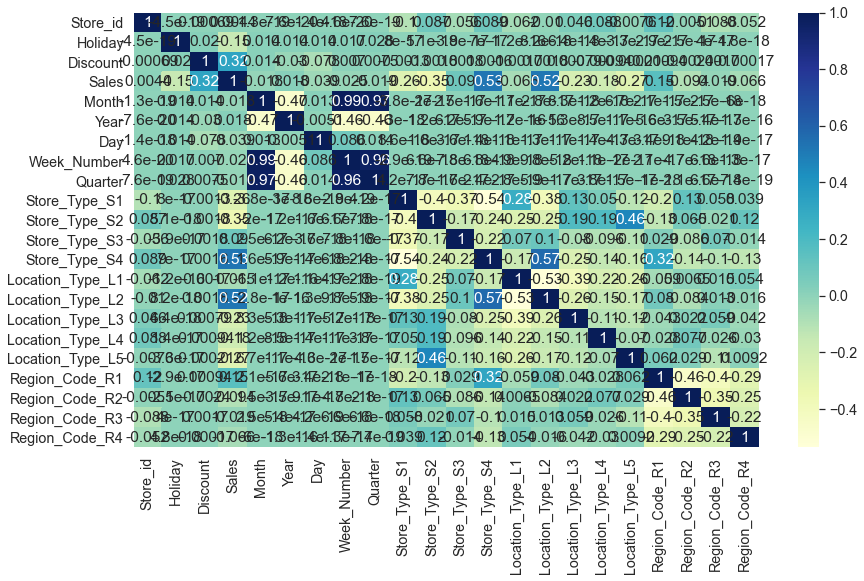

In [81]:
plt.figure(figsize=(14, 8))
_ = sns.heatmap(train.corr(), annot=True,cmap='YlGnBu') #cmap="RdYlGn" #cmap=plt.cm.CMRmap_r

In [82]:
# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything other feature

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [83]:
# Calling function
corr_features = correlation(train, 0.7)

# Checking how many features are having high correlation greater than 0.7
print("Number of features which are having high correlation greater than 0.7 are: ",len(set(corr_features)))

Number of features which are having high correlation greater than 0.7 are:  2


In [84]:
# Checking what are the feature names which are having high correlation greater than 0.7
print("Feature names which are having high correlation greater than 0.7 are: ",corr_features)

Feature names which are having high correlation greater than 0.7 are:  {'Quarter', 'Week_Number'}


In [85]:
# Dropping these features from the dataset
train = train.drop(corr_features,axis=1)

In [86]:
test= pd.get_dummies(test,columns = ['Store_Type','Location_Type','Region_Code'])
test.head()

Store_id       Date  Holiday  Discount  Month  Year  Day  Week_Number  \
0       171 2019-06-01        0         0      6  2019    1           22   
1       172 2019-06-01        0         0      6  2019    1           22   
2       173 2019-06-01        0         0      6  2019    1           22   
3       174 2019-06-01        0         0      6  2019    1           22   
4       170 2019-06-01        0         0      6  2019    1           22   

   Quarter  Store_Type_S1  ...  Store_Type_S4  Location_Type_L1  \
0        2              0  ...              1                 0   
1        2              1  ...              0                 1   
2        2              0  ...              1                 0   
3        2              1  ...              0                 1   
4        2              1  ...              0                 1   

   Location_Type_L2  Location_Type_L3  Location_Type_L4  Location_Type_L5  \
0                 1                 0                 0                 0   
1                 0                 0                 0                 0   
2                 1                 0                 0                 0   
3                 0                 0                 0                 0   
4                 0                 0                 0                 0   

   Region_Code_R1  Region_Code_R2  Region_Code_R3  Region_Code_R4  
0               0               0               1               0  
1               1               0               0               0  
2               1               0               0               0  
3               0               0               0               1  
4               0               1               0               0  

[5 rows x 22 columns]

In [87]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 188340 entries, 0 to 188339
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Store_id          188340 non-null  int64         
 1   Date              188340 non-null  datetime64[ns]
 2   Holiday           188340 non-null  int64         
 3   Discount          188340 non-null  int64         
 4   Sales             188340 non-null  float64       
 5   Month             188340 non-null  int64         
 6   Year              188340 non-null  int64         
 7   Day               188340 non-null  int64         
 8   Store_Type_S1     188340 non-null  uint8         
 9   Store_Type_S2     188340 non-null  uint8         
 10  Store_Type_S3     188340 non-null  uint8         
 11  Store_Type_S4     188340 non-null  uint8         
 12  Location_Type_L1  188340 non-null  uint8         
 13  Location_Type_L2  188340 non-null  uint8         
 14  Loca

In [88]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22265 entries, 0 to 22264
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Store_id          22265 non-null  int64         
 1   Date              22265 non-null  datetime64[ns]
 2   Holiday           22265 non-null  int64         
 3   Discount          22265 non-null  int64         
 4   Month             22265 non-null  int64         
 5   Year              22265 non-null  int64         
 6   Day               22265 non-null  int64         
 7   Week_Number       22265 non-null  int64         
 8   Quarter           22265 non-null  int64         
 9   Store_Type_S1     22265 non-null  uint8         
 10  Store_Type_S2     22265 non-null  uint8         
 11  Store_Type_S3     22265 non-null  uint8         
 12  Store_Type_S4     22265 non-null  uint8         
 13  Location_Type_L1  22265 non-null  uint8         
 14  Location_Type_L2  2226

In [89]:
train = train.drop(columns=['Date'])

train.columns

Index(['Store_id', 'Holiday', 'Discount', 'Sales', 'Month', 'Year', 'Day',
       'Store_Type_S1', 'Store_Type_S2', 'Store_Type_S3', 'Store_Type_S4',
       'Location_Type_L1', 'Location_Type_L2', 'Location_Type_L3',
       'Location_Type_L4', 'Location_Type_L5', 'Region_Code_R1',
       'Region_Code_R2', 'Region_Code_R3', 'Region_Code_R4'],
      dtype='object')

In [90]:
test = test.drop(columns=['Date','Quarter', 'Week_Number'])

test.columns

Index(['Store_id', 'Holiday', 'Discount', 'Month', 'Year', 'Day',
       'Store_Type_S1', 'Store_Type_S2', 'Store_Type_S3', 'Store_Type_S4',
       'Location_Type_L1', 'Location_Type_L2', 'Location_Type_L3',
       'Location_Type_L4', 'Location_Type_L5', 'Region_Code_R1',
       'Region_Code_R2', 'Region_Code_R3', 'Region_Code_R4'],
      dtype='object')

In [91]:
train.shape

(188340, 20)

In [92]:
test.shape

(22265, 19)

In [93]:
X = train.drop('Sales',axis=1)
y = train['Sales']

In [94]:
X_train = X.iloc[:-22265]

X_val = X.iloc[166075:]

y_train = y.iloc[:-22265]

y_val = y.iloc[166075:]

In [96]:
X_test = test[X_val.columns]

In [97]:
X_test.shape

(22265, 19)

In [98]:
X_val.shape

(22265, 19)

In [100]:
X_train

Store_id  Holiday  Discount  Month  Year  Day  Store_Type_S1  \
0              1        1         1      1  2018    1              1   
1            253        1         1      1  2018    1              0   
2            252        1         1      1  2018    1              0   
3            251        1         1      1  2018    1              0   
4            250        1         1      1  2018    1              0   
...          ...      ...       ...    ...   ...  ...            ...   
166070       297        0         0      3  2019   31              0   
166071       136        0         0      3  2019   31              0   
166072       108        0         0      3  2019   31              1   
166073       162        0         0      3  2019   31              0   
166074        41        0         0      3  2019   31              1   

        Store_Type_S2  Store_Type_S3  Store_Type_S4  Location_Type_L1  \
0                   0              0              0                 0   
1                   0              0              1                 0   
2                   0              1              0                 0   
3                   1              0              0                 0   
4                   1              0              0                 0   
...               ...            ...            ...               ...   
166070              1              0              0                 0   
166071              1              0              0                 0   
166072              0              0              0                 1   
166073              0              0              1                 1   
166074              0              0              0                 1   

        Location_Type_L2  Location_Type_L3  Location_Type_L4  \
0                      0                 1                 0   
1                      1                 0                 0   
2                      1                 0                 0   
3                      0                 1                 0   
4                      0                 1                 0   
...                  ...               ...               ...   
166070                 0                 1                 0   
166071                 0                 0                 0   
166072                 0                 0                 0   
166073                 0                 0                 0   
166074                 0                 0                 0   

        Location_Type_L5  Region_Code_R1  Region_Code_R2  Region_Code_R3  \
0                      0               1               0               0   
1                      0               1               0               0   
2                      0               1               0               0   
3                      0               1               0               0   
4                      0               0               0               0   
...                  ...             ...             ...             ...   
166070                 0               0               0               0   
166071                 1               0               0               0   
166072                 0               0               0               0   
166073                 0               0               1               0   
166074                 0               0               1               0   

        Region_Code_R4  
0                    0  
1                    0  
2                    0  
3                    0  
4                    1  
...                ...  
166070               1  
166071               1  
166072               1  
166073               0  
166074               0  

[166075 rows x 19 columns]

In [101]:
X_val

Store_id  Holiday  Discount  Month  Year  Day  Store_Type_S1  \
166075       152        0         0      4  2019    1              0   
166076        24        0         0      4  2019    1              1   
166077       227        0         0      4  2019    1              0   
166078       107        0         0      4  2019    1              1   
166079       348        0         0      4  2019    1              0   
...          ...      ...       ...    ...   ...  ...            ...   
188335       149        1         1      5  2019   31              0   
188336       153        1         0      5  2019   31              0   
188337       154        1         0      5  2019   31              1   
188338       155        1         1      5  2019   31              0   
188339       152        1         0      5  2019   31              0   

        Store_Type_S2  Store_Type_S3  Store_Type_S4  Location_Type_L1  \
166075              1              0              0                 1   
166076              0              0              0                 1   
166077              0              0              1                 0   
166078              0              0              0                 0   
166079              0              1              0                 1   
...               ...            ...            ...               ...   
188335              1              0              0                 0   
188336              0              0              1                 0   
188337              0              0              0                 0   
188338              0              1              0                 1   
188339              1              0              0                 1   

        Location_Type_L2  Location_Type_L3  Location_Type_L4  \
166075                 0                 0                 0   
166076                 0                 0                 0   
166077                 1                 0                 0   
166078                 0                 1                 0   
166079                 0                 0                 0   
...                  ...               ...               ...   
188335                 0                 1                 0   
188336                 1                 0                 0   
188337                 0                 1                 0   
188338                 0                 0                 0   
188339                 0                 0                 0   

        Location_Type_L5  Region_Code_R1  Region_Code_R2  Region_Code_R3  \
166075                 0               1               0               0   
166076                 0               0               1               0   
166077                 0               1               0               0   
166078                 0               0               0               1   
166079                 0               1               0               0   
...                  ...             ...             ...             ...   
188335                 0               0               1               0   
188336                 0               1               0               0   
188337                 0               0               1               0   
188338                 0               0               1               0   
188339                 0               1               0               0   

        Region_Code_R4  
166075               0  
166076               0  
166077               0  
166078               0  
166079               0  
...                ...  
188335               0  
188336               0  
188337               0  
188338               0  
188339               0  

[22265 rows x 19 columns]

### Modelling

In [103]:
from sklearn.model_selection import cross_val_score
# function to get cross validation scores
def get_cv_scores(model):
    scores = cross_val_score(model,
                             X_train,
                             y_train,
                             cv=5,
                             scoring='r2')
    
    print('CV Mean: ', np.mean(scores))
    print('STD: ', np.std(scores))
    print('\n')

#### Linear Regression

In [105]:
from sklearn import linear_model

linear_regression = linear_model.LinearRegression()

linear_regression.fit(X_train,y_train)

lr_predictions = linear_regression.predict(X_test)

# get cross val scores
get_cv_scores(linear_regression)

CV Mean:  0.5529380283325054
STD:  0.03243105670051851




In [106]:
from sklearn.metrics import mean_squared_error as mse
from math import sqrt

# Print out the root mean square error (RMSE)
lr_rmse = sqrt(mse(y_val, lr_predictions))

print('Root Mean Square Error:', lr_rmse)

Root Mean Square Error: 25183.384211911587


In [107]:
from sklearn.metrics import mean_squared_log_error

print(mean_squared_log_error(y_val, lr_predictions)) #  1).   0.31575701313534843

0.31967910326532645


#### Decision Tree Regressor

In [ ]:
# Decision Tree Regression Model
from sklearn.tree import DecisionTreeRegressor
from math import sqrt
from sklearn.metrics import mean_squared_error as mse

  
# create a regressor object 
decision_tree = DecisionTreeRegressor(random_state = 0)  
  
# fit the regressor with X and Y data 
decision_tree.fit(X_train, y_train)

dt_predictions = decision_tree.predict(X_test)

# Print out the root mean square error (RMSE)
dt_rmse = sqrt(mse(y_val, dt_predictions))

print('Root Mean Square Error:', dt_rmse)

In [ ]:
from sklearn.metrics import mean_squared_log_error

print(mean_squared_log_error(y_val, dt_predictions)) # 2).  0.42197299025079493

#### Random Forest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from math import sqrt
from sklearn.metrics import mean_squared_error as mse

# Instantiate model with 1000 decision trees
random_forest = RandomForestRegressor() #n_estimators = 1000, random_state = 42

# Train the model on training data
random_forest.fit(X_train, y_train)

# Use the forest's predict method on the test data
rf_predictions = random_forest.predict(X_test)

# Print out the root mean square error (RMSE)
rf_rmse = sqrt(mse(y_val, rf_predictions))

print('Root Mean Square Error:', rf_rmse)

In [ ]:
from sklearn.metrics import mean_squared_log_error

print(mean_squared_log_error(y_val, rf_predictions)) # 2).  0.34693436595584803

In [ ]:
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
print(random_forest.get_params())

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from math import sqrt
import time
from sklearn.metrics import mean_squared_error as mse
from pprint import pprint

# Number of trees in random forest
#n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 20)]
n_estimators = [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000, 2200, 2400, 2600, 2800]

# Number of features to consider at every split
max_features = ['auto', 'sqrt','log2']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 20, 30, 40, 50, 60, 70]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4, 6, 8, 10]

# Method of selecting samples for training each tree
bootstrap = [True, False]

criterion = ["mse", "mae"]

max_leaf_nodes = [8, 16, 32, 64, 128, 256, 512, 1024]

#class_weight = [{0: 1, 1: 1}, {0: 1, 1: 2}, {0: 1, 1: 3}, {0: 1, 1: 4}, {0: 1, 1: 5}]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap,
              'criterion': criterion,
              'max_leaf_nodes': max_leaf_nodes}

pprint(random_grid)

In [ ]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf2 = RandomForestRegressor(random_state = 1)
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf2 = RandomizedSearchCV(estimator=rf2, param_distributions=random_grid,n_iter = 100, scoring='f1',
                          cv = 3, verbose=2, random_state=1, n_jobs=-1,return_train_score=True)

# Fit the random search model
t1 = time.time()
search = rf2.fit(X_train, y_train)
t2 = time.time()
print("Time taken model to fit on data (seconds):",t2-t1)
search.best_params_

Fitting 3 folds for each of 100 candidates, totalling 300 fits


In [ ]:
optimal_params = {}

rf2 = RandomForestRegressor(random_state = 1, **optimal_params)
t1 = time.time()
rf2.fit(X_train,y_train)
t2 = time.time()
print("Time taken model to fit on data (seconds):",t2-t1)
rf2_pred = rf2.predict(X_test)

#### Gradient Boosting Regressor

In [100]:
from sklearn import datasets, ensemble
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

params = {'n_estimators': 100,
          'max_depth': 4,
          'learning_rate': 0.01,
          'loss': 'ls'}

gradient_boosting = ensemble.GradientBoostingRegressor(**params)
gradient_boosting.fit(X_train, y_train)

gb_predictions = gradient_boosting.predict(X_test)
gb_rmse = sqrt(mse(y_val, gb_predictions))

print("Gradient Boosting Regression:", 100 * max(0,1 - gb_rmse))

Gradient Boosting Regression: 0


In [101]:
from sklearn.metrics import mean_squared_log_error

print(mean_squared_log_error(y_val, gb_predictions)) # 2).  

0.24351130406658086


#### support vector regressor

In [ ]:
from sklearn.svm import SVR

support_vector_regressor = SVR(kernel='rbf')

# Train the model on training data
support_vector_regressor.fit(X_train, y_train)

svr_predictions = support_vector_regressor.predict(X_test)

# Print out the root mean square error (RMSE)
svr_rmse = sqrt(mse(y_val, svr_predictions))

print('Root Mean Square Error:', svr_rmse)

In [ ]:
from sklearn.metrics import mean_squared_log_error

print(mean_squared_log_error(y_val, svr_predictions)) # 2).  

#### KNeighbors Regressor

In [103]:
from sklearn.neighbors import KNeighborsRegressor

k_neighor_neighbors = KNeighborsRegressor()

k_neighor_neighbors.fit(X_train,y_train)

knn_predictions = k_neighor_neighbors.predict(X_test)

# Print out the root mean square error (RMSE)
knn_rmse = sqrt(mse(y_val, knn_predictions))

print('Root Mean Square Error:', knn_rmse)

Root Mean Square Error: 25309.216826295167


In [104]:
from sklearn.metrics import mean_squared_log_error

print(mean_squared_log_error(y_val, knn_predictions)) # 2).  

0.30128288638311324


### ElasticNet

In [113]:
from sklearn.linear_model import ElasticNetCV,ElasticNet

#alphas = [0.0001, 0.001, 0.01, 0.1, 0.3, 0.5, 0.7, 1]
elasticnet = ElasticNet(alpha=1, l1_ratio=0.5).fit(X_train,y_train)   
score = elasticnet.score(X_train, y_train)
en_predictions = elasticnet.predict(X_test)
en_rmse = sqrt(mse(y_val, en_predictions))

print("Elastic Net:", 100 * max(0,1 - en_rmse))

Elastic Net: 0


In [ ]:
# find optimal alpha with grid search
from sklearn.model_selection import GridSearchCV, cross_val_score

alpha = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
l1_ratio = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]

param_grid = dict(alpha=alpha, l1_ratio=l1_ratio)

grid = GridSearchCV(estimator=elasticnet, param_grid=param_grid, scoring='r2', verbose=1, n_jobs=-1)

grid_result = grid.fit(X_train, y_train)

print('Best Score: ', grid_result.best_score_)
print('Best Params: ', grid_result.best_params_)

Fitting 5 folds for each of 77 candidates, totalling 385 fits


In [107]:
from sklearn.metrics import mean_squared_log_error

print(mean_squared_log_error(y_val, en_predictions)) # 2).  

0.29407330982808244


### Ridge 

In [108]:
from sklearn.linear_model import RidgeCV

ridge = RidgeCV(alphas=alphas,normalize=True)
ridge.fit(X_train, y_train)
rr_predictions = ridge.predict(X_test)
rr_rmse = sqrt(mse(y_val, rr_predictions))

print("Ridge Regression:", 100 * max(0,1 - rr_rmse))

Ridge Regression: 0


In [109]:
from sklearn.metrics import mean_squared_log_error

print(mean_squared_log_error(y_val, rr_predictions)) # 2).  0.31966226779817447

0.29422941804002817


### Lasso

In [110]:
from sklearn.linear_model import LassoCV

lasso = LassoCV(cv=5,n_jobs=-1,random_state=1,normalize=True)
lasso.fit(X_train, y_train)
lasso_predictions = lasso.predict(X_test)
lasso_rmse = sqrt(mse(y_val, lasso_predictions))

print("Lasso Regression:", 100 * max(0,1 - lasso_rmse))

Lasso Regression: 0


In [111]:
from sklearn.metrics import mean_squared_log_error

print(mean_squared_log_error(y_val, lasso_predictions)) # 2).  0.3017189823500861

0.28684705237956987


### XGBRegressor

In [105]:
####### 1
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import mean_squared_error as mse
from math import sqrt

xgbr = xgb.XGBRegressor(objective='reg:squarederror')

xgbr.fit(X_train, y_train)
 
xgbr_pred = xgbr.predict(X_test)

#mse = mean_squared_error(y_test, xgbr_pred)
#print("RMSE: %.2f" % (mse**(1/2.0)))

In [106]:
from sklearn.metrics import mean_squared_log_error

print(mean_squared_log_error(y_val, xgbr_pred)) # 2).  0.3017189823500861

0.3213633451382325


In [ ]:
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV

params = { 'max_depth': [3, 5, 6, 10, 15, 20],
           'learning_rate': [0.01, 0.1, 0.2, 0.3],
           'subsample': np.arange(0.5, 1.0, 0.1),
           'colsample_bytree': np.arange(0.4, 1.0, 0.1),
           'colsample_bylevel': np.arange(0.4, 1.0, 0.1),
           'n_estimators': [100, 500, 1000]}

xgbr2 = xgb.XGBRegressor(seed = 20)

clf = RandomizedSearchCV(estimator=xgbr2,
                         param_distributions=params,
                         scoring='neg_mean_squared_error',
                         n_iter=25,
                         verbose=1)

clf.fit(X_train, y_train)

print("Best parameters:", clf.best_params_)
print("Lowest RMSE: ", (-clf.best_score_)**(1/2.0))

Fitting 5 folds for each of 25 candidates, totalling 125 fits


In [133]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error

xgbr = xgb.XGBRegressor(objective='reg:squarederror')
xgbr.fit(X_train, y_train)

ypred = xgbr.predict(X_test)

mse = mean_squared_error(y_val, ypred)
print("RMSE: %.2f" % (mse**(1/2.0)))

RMSE: 26093.41


In [134]:
from sklearn.metrics import mean_squared_log_error

print(mean_squared_log_error(y_val, ypred)) # 2). 

0.3213633451382325


### LGBMRegressor

In [102]:
import lightgbm as lgb
from scipy.stats import norm
from sklearn.metrics import mean_squared_log_error

hyper_params = {
    'task': 'train',
    'boosting_type': 'gbdt',
    'objective': 'regression',
    'metric': ['l1','l2'],
    'learning_rate': 0.005,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.7,
    'bagging_freq': 10,
    'verbose': 0,
    "max_depth": 8,
    "num_leaves": 128,  
    "max_bin": 512,
    "num_iterations": 500
}

gbm = lgb.LGBMRegressor(**hyper_params)

gbm.fit(X_train, y_train,
        eval_set=[(X_test, y_val)],
        eval_metric='l1',
        early_stopping_rounds=100)

y_pred = gbm.predict(X_train, num_iteration=gbm.best_iteration_)
# Basic RMSE
print('The msle of prediction is:', round(mean_squared_log_error(y_pred, y_train) ** 0.5, 5))

[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=10, subsample_freq=0 will be ignored. Current value: bagging_freq=10
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=10, subsample_freq=0 will be ignored. Current value: bagging_freq=10
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.331959 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.

In [126]:
test_pred = gbm.predict(X_test, num_iteration=gbm.best_iteration_) #np.expm1

In [127]:
test_pred

array([42677.85434385, 42331.41132434, 42974.74497909, ...,
       42456.96185061, 42301.2705308 , 42176.0228149 ])

### CatBoostRegressor

In [ ]:
import catboost as cb
from sklearn.inspection import permutation_importance
from sklearn.metrics import mean_squared_error
from math import sqrt

model = cb.CatBoostRegressor(loss_function='RMSE')

grid = {'iterations': [100, 150, 200, 250, 300, 450, 500, 550, 600],
        'learning_rate': [0.03, 0.1, 0.01],
        'depth': [2, 4, 6, 8, 10, 12, 14],
        'l2_leaf_reg': [0.2, 0.5, 1, 2, 3, 4]}

model.grid_search(grid, X_train,y_train)
pred = model.predict(X_test)
#rmse = (np.sqrt(mean_squared_error(y_val, pred)))
#rmse

0:	learn: 44827.8095628	test: 44922.9073956	best: 44922.9073956 (0)	total: 583ms	remaining: 57.7s
1:	learn: 43633.0473941	test: 43728.3169534	best: 43728.3169534 (1)	total: 593ms	remaining: 29s
2:	learn: 42466.9157596	test: 42561.1393997	best: 42561.1393997 (2)	total: 604ms	remaining: 19.5s
3:	learn: 41330.6702518	test: 41425.8805786	best: 41425.8805786 (3)	total: 641ms	remaining: 15.4s
4:	learn: 40239.3524216	test: 40333.3393413	best: 40333.3393413 (4)	total: 651ms	remaining: 12.4s
5:	learn: 39176.5261890	test: 39271.6324054	best: 39271.6324054 (5)	total: 661ms	remaining: 10.4s
6:	learn: 38156.4975250	test: 38250.5784722	best: 38250.5784722 (6)	total: 671ms	remaining: 8.92s
7:	learn: 37159.0333951	test: 37252.6798370	best: 37252.6798370 (7)	total: 682ms	remaining: 7.84s
8:	learn: 36195.4285495	test: 36288.7306969	best: 36288.7306969 (8)	total: 696ms	remaining: 7.04s
9:	learn: 35264.7382924	test: 35357.7843391	best: 35357.7843391 (9)	total: 706ms	remaining: 6.35s
10:	learn: 34366.13252

In [ ]:
from sklearn.metrics import mean_squared_log_error

print(mean_squared_log_error(y_val, pred)) # 

In [ ]:
print(gb_predictions.shape)
print(X_test.shape)

In [142]:
submission = pd.DataFrame()
submission['ID'] = sample['ID']
submission['Sales'] = pred

In [143]:
submission

ID         Sales
0      T1188341  61259.064494
1      T1188342  39208.913783
2      T1188343  75910.298338
3      T1188344  39304.840043
4      T1188345  38524.583780
...         ...           ...
22260  T1210601  18214.213781
22261  T1210602  54712.434688
22262  T1210603  42885.153728
22263  T1210604  31059.262265
22264  T1210605  25983.191042

[22265 rows x 2 columns]

In [144]:
submission.to_csv('C://Users//karth//Downloads//catboostregressor.csv',index=False)